# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-3 (40일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat 중 내과 분석

## 진료과목 중 내과만 자세히 살피기

공공 테이터 포털 (data.go.kr) 에서 각 정부부처에서 공개한 데이터들을 볼 수 있습니다. 그 중에서 건강보험공간에서 공개한 100만 건의 진료내역 정보를 살펴 봅시다. 원본 데이터는 2015년 약 100만건의 진료내역을 담고 있으나. 우리는 서울의 외래 진료내역인 약 200만건 데이터를 살펴 볼 것입니다.

In [1]:
treat = read.csv("Practice/data/treat.csv")

In [2]:
# 데이터의 구성을 살펴 볼 것입니다.
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : int  2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


   * 이 데이터는 원본데이터를 가공한것입니다.
   * 5개의 변수를 선택하고, 숫자로 코딩되어 있던 AGE (연령대) 와 DSBJT(진료과목)을 건강보험공단의 코딩표를 참조하여 보기 쉽게 수정했습니다.
   * MAIN_SICK 은 환자가 병원에서 진료를 받을 때 질병의 종류를 구분한 코드 입니다.
   
   
   * str() 함수로 살펴 본 바, MONTH(수진월) 과 SEX(성별) 이 int 형태로 구렁되어 있습니다.
   * 의미상 범주형이므로 factor 를 사용해서 범주형 변수로 바꾸고 수준 이름도 바꿔 봅니다.

In [3]:
treat$MONTH = factor(treat$MONTH)
treat$SEX = factor(treat$SEX)
levels(treat$SEX)

[1] "1" "2"

In [4]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


MONTH 와 SEX 가 범주형 변수로 바뀌었습니다. 이제 levels 를 이용해서 수준을 바꾸어 봅니다.

In [5]:
levels(treat$SEX) = c("1_남", "2_여")

In [6]:
str(treat)

'data.frame':	2016783 obs. of  5 variables:
 $ MONTH    : Factor w/ 12 levels "1","2","3","4",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ AGE      : Factor w/ 18 levels "01_0-4세","02_5-9세",..: 13 16 11 11 11 7 4 1 17 12 ...
 $ SEX      : Factor w/ 2 levels "1_남","2_여": 2 1 2 2 2 2 2 2 2 2 ...
 $ DSBJT    : Factor w/ 20 levels "가정의학과","내과",..: 11 11 11 11 11 11 11 19 19 19 ...
 $ MAIN_SICK: Factor w/ 1407 levels "A02","A03","A04",..: 460 446 446 449 449 68 449 724 71 724 ...


 #### treat 에서 treat 데이터 중 내과만 자세히 분석

   * 내과 과목중에서 MAIN_SICK 와 AGE 관계를 보면 연령에 따라 어떤 병에 많이 걸리는지 확인할 수 있습니다.
   * 분석중에 문제는 MAIN_SICK 의 질병 종류가 1047 로 너무 많아서 그림으로 표현이 힘들다는 점입니다.

In [7]:
internal = subset(treat, DSBJT='내과')

In [8]:
t_MS_AGE = table(internal$MAIN_SICK, internal$AGE)

In [9]:
dim(t_MS_AGE)

[1] 1407   18

In [11]:
head(t_MS_AGE, 5)

     
      01_0-4세 02_5-9세 03_10-14세 04_15-19세 05_20-24세 06_25-29세 07_30-34세
  A02        2        1          0          1          1          0          1
  A03        0        0          0          1          0          0          1
  A04      119       96        103        231        268        335        288
  A05        2        2          2          8         21         21         19
  A06        0        0          0          0          5          2          1
     
      08_35-39세 09_40-44세 10_45-49세 11_50-54세 12_55-59세 13_60-64세
  A02          0          0          0          1          0          0
  A03          0          0          0          0          0          0
  A04        202        181        196        164        170        176
  A05         20         12         12         13          8          7
  A06          6          1          0          2          0          0
     
      14_65-69세 15_70-74세 16_75-79세 17_80-84세 18_85세이상
  A02          0          0       

질병코드 A02,... 는 [KOICD 질병분류정보센터](http://www.koicd.kr/) 에서 확인 할 수 있습니다.
예를 들어 A02 는 기타 살모네라 감염 입니다.

   * 진료건수가 많은 질병만 살펴보는것이 더 의미가 있을 것입니다. 따라서 어떤 병이 진료 건수가 많은지 행 합계를 계산하여 봅니다.

In [14]:
t_MS_AGE2 = t_MS_AGE[rowSums(t_MS_AGE)>20000,]

In [15]:
t_MS_AGE2

     
      01_0-4세 02_5-9세 03_10-14세 04_15-19세 05_20-24세 06_25-29세 07_30-34세
  E11        0        0          8         30         97         70        295
  H10     2197     2087       1101       1034       1052       1146       1371
  I10        0        0          8         34         81        150        506
  J00     8699     3095        884        726        623        815       1114
  J01     9562     5964       1875       1434       1078       1410       1964
  J02     8298     3847       1825       1705       1112       1529       2013
  J03     6081     4374       2215       2170       1731       2450       2969
  J04     2578     2202       1181       1167        855       1332       1692
  J06     9286     4098       1807       1647       1259       1641       2132
  J20    40386    21879       6885       5146       3438       4137       6211
  J30     7491     6056       2923       2277       1555       1960       2418
  K21      118       94        146        472        

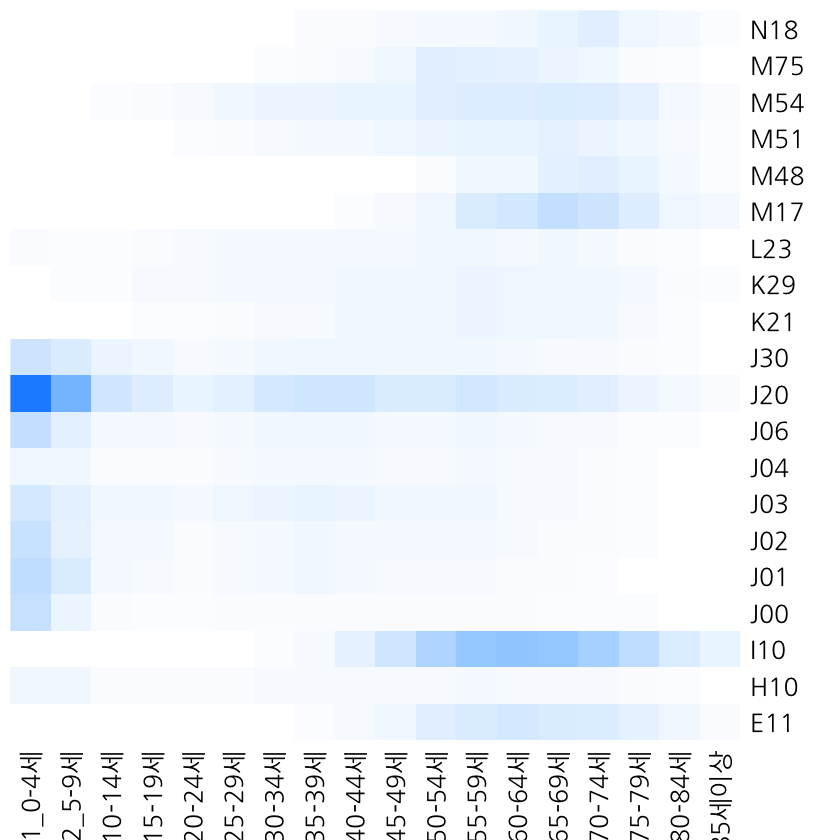

In [18]:
par(family="NanumGothic")
options(warn=-1)
heatmap(t_MS_AGE2, col=colorRampPalette(c('white', 'dodgerblue'))(100), scale='none', Rowv=NA, Colv=NA, cexRow=1.5, cexCol=1.5)

중요한 질병 코드 를 KOICD 에서 검색해보면 다음과 같습니다.

| MAIN_SICK     | 질병코드          |
| ------------- |:---------------:|
| N18           | 만성 신장병       |
| K29           | 위염 및 십이자장염  |
| K21           | 위-식도 역류병     |
| J20           | 급성 기관지염      |
| I10           | 본태성 고혈압      |
| E11           | 2형 당뇨병        |

   * 젊은 사람은 K29 위염및 십이지장염으로 고통을 받고 있습니다.
   * 어린 아이는 J20 급성기관지염으로 병원을 찾고 있습니다.
   * 중년에 접어 들수록 I10 고혈압, E11 당뇨병 때문에 병원을 찾고 있습니다.
   * 노년에 접어 들수록 N18 만성신장염 으로 진료를 받는 사람이 많습니다.